# Generate Beam-Related Neutron (BRN)

In [1]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load the BRN spectrum

In [2]:
filename = '/Users/yuntse/data/coherent/preLArTPC/mcnp/BRN_400M_100cm_1e5.root'
f = ROOT.TFile( filename, 'READ')

In [3]:
hBRN = f.Get("1")

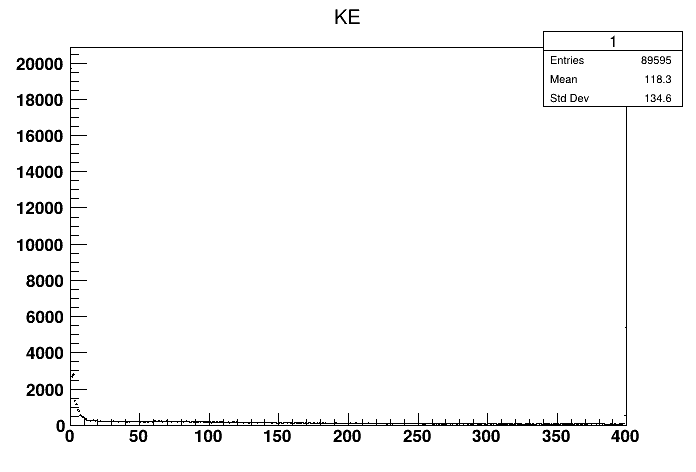

In [4]:
canvas = ROOT.TCanvas("c1", "BRN KE")
hBRN.Draw()
canvas.Draw()

In [5]:
brn = np.array([ hBRN.GetBinContent(i+1) for i in range(hBRN.GetNbinsX()) ])
brn_bins = np.array([ hBRN.GetBinLowEdge(i+1) for i in range(hBRN.GetNbinsX() + 1) ])

In [6]:
brn

array([19716.,  2688.,  2803.,  1351.,  1160.,   868.,   767.,   552.,
         489.,   445.,   356.,   330.,   275.,   255.,   247.,   271.,
         282.,   257.,   249.,   248.,   203.,   223.,   205.,   220.,
         207.,   215.,   210.,   213.,   210.,   201.,   210.,   223.,
         213.,   215.,   190.,   209.,   199.,   205.,   202.,   192.,
         190.,   193.,   184.,   210.,   205.,   199.,   214.,   210.,
         211.,   211.,   195.,   202.,   193.,   193.,   191.,   194.,
         196.,   205.,   209.,   183.,   224.,   223.,   217.,   237.,
         223.,   233.,   188.,   198.,   199.,   227.,   221.,   214.,
         185.,   212.,   217.,   210.,   204.,   183.,   211.,   212.,
         218.,   191.,   206.,   228.,   205.,   200.,   163.,   194.,
         190.,   186.,   175.,   185.,   190.,   195.,   208.,   186.,
         185.,   177.,   185.,   191.,   199.,   138.,   183.,   170.,
         160.,   184.,   163.,   177.,   183.,   176.,   180.,   169.,
      

In [7]:
brn_bins

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [17]:
brn.sum()-72.-70.-110.-545.-5399.

79369.0

## Generate BRN Kinetic Energy

In [8]:
rng = np.random.default_rng()

In [9]:
def getNSamples(xmin, xmax, N):
    return rng.uniform(xmin, xmax, N)

In [10]:
def isAccepted(n, vPDF, maxPDF):
    return rng.uniform(0., maxPDF, n) < vPDF

In [11]:
def rejectSampling(kemin, kemax, nSamples):
    outSamples = getNSamples(kemin, kemax, nSamples)
    outSampleBins = np.floor(outSamples).astype(int)
    outPDF = brn[outSampleBins]
    maxPDF = brn[0]

    mask = isAccepted(len(outSamples), outPDF, maxPDF)
    reject, = np.where(~mask)

    while reject.size > 0:
        fill = getNSamples(kemin, kemax, reject.size)
        fillBins = np.floor(fill).astype(int)
        
        fillPDF = brn[fillBins]
        mask = isAccepted(len(fill), fillPDF, maxPDF)
        outSamples[reject[mask]] = fill[mask]
        reject = reject[~mask]

    return outSamples

In [12]:
nSamples = 100000
voutSamples = rejectSampling(0., 395., nSamples)
len(voutSamples)

100000

In [13]:
voutSamples

array([ 26.1410876 ,   0.70881796, 116.71603049, ..., 126.49595676,
         0.35743733,  77.99983346])

## Validation

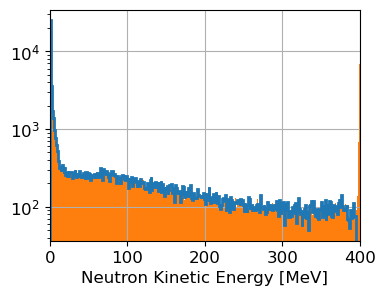

In [18]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.hist(voutSamples, bins = np.linspace(0, 400, 401), histtype = 'step', lw = 2)
ax.bar(brn_bins[:-1], brn*nSamples/79369., width = np.diff(brn_bins), align = "edge")
ax.set_xlabel( 'Neutron Kinetic Energy [MeV]', fontsize = 12 )
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_xlim( [0, 400])
ax.semilogy()
ax.grid(':')

In [19]:
outHist = np.histogram(voutSamples, bins = np.linspace(0, 395, 396))
outHist

(array([25079,  3302,  3622,  1724,  1396,  1124,   964,   757,   616,
          516,   451,   387,   320,   314,   292,   327,   344,   314,
          275,   312,   255,   275,   250,   287,   251,   277,   279,
          277,   282,   233,   272,   266,   300,   255,   244,   264,
          243,   264,   286,   246,   244,   235,   260,   271,   255,
          229,   277,   281,   234,   273,   249,   261,   221,   260,
          241,   244,   244,   264,   253,   242,   263,   270,   240,
          275,   261,   317,   251,   285,   222,   303,   282,   274,
          257,   292,   273,   239,   245,   216,   261,   290,   285,
          271,   256,   268,   246,   243,   200,   250,   238,   234,
          196,   201,   249,   260,   246,   252,   226,   218,   224,
          248,   231,   177,   229,   202,   208,   239,   187,   233,
          215,   237,   237,   206,   181,   217,   187,   187,   229,
          225,   208,   204,   211,   180,   174,   168,   167,   178,
      

In [31]:
ref = brn[:-5]*nSamples/79369.
len(ref)

395

In [36]:
len(outHist[0])

395

In [32]:
trim_bins = brn_bins[:-5]

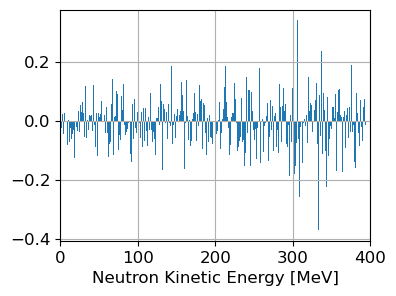

In [38]:
fig, ax = plt.subplots( figsize = (4, 3) )  

ax.bar(brn_bins[:-6], (outHist[0]-ref)/ref, width = np.diff(brn_bins[:-5]), align = "edge")
ax.set_xlabel( 'Neutron Kinetic Energy [MeV]', fontsize = 12 )
ax.tick_params(axis = 'x', labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_xlim( [0, 400])
# ax.semilogy()
ax.grid(':')

## Fill the output ROOT file

In [39]:
nPdg = 2112
# unit: GeV
nMass = 0.9395654205

In [41]:
nEventPerFile = 10000
nFiles = int(nSamples/nEventPerFile)
nFiles

10